# Reconhecimento e Geração de Fala

In [1]:
## Bibliotecas a serem instaladas
# !apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg
# !pip install PyAudio
# !pip install Wave
# !pip install gTTS
# !pip install ipython
# !pip install SpeechRecognition

In [1]:
## Bibliotecas a serem importadas
import numpy as np
import pyaudio
import wave
import gtts
import IPython
import speech_recognition as sr
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [7, 5]
sns.set_style("ticks")

In [4]:
class Functions:
    def __init__(self, file_name = '', chunk = '', channels = '', sample_rate = '', record_seconds = '', format = '', text = '', path = ''):
        
        
        
        self.file_name = file_name
        self.chunk = chunk
        self.channels = channels
        self.sample_rate = sample_rate
        self.record_seconds = record_seconds
        self.format = format
        self.text = text
        
    
    def record(self):
        p = pyaudio.PyAudio()
        
        # open stream object as input & output
        stream = p.open(format=self.format,
                        channels=self.channels,
                        rate=self.sample_rate,
                        input=True,
                        output=True,
                        frames_per_buffer=self.chunk)
        frames = []

        print("Recording...")
        for i in range(int(self.sample_rate / self.chunk * self.record_seconds)):
            data = stream.read(self.chunk)
            # if you want to hear your voice while recording
            # stream.write(data)
            frames.append(data)
        print("Finished recording.")
        # stop and close stream
        stream.stop_stream()
        stream.close()
        # terminate pyaudio object
        p.terminate()
        
        return frames, p
        
    def save_record(self, frames, p):
        # save audio file
        # open the file in 'write bytes' mode
        wf = wave.open(self.file_name, "wb")
        # set the channels
        wf.setnchannels(self.channels)
        # set the sample format
        wf.setsampwidth(p.get_sample_size(self.format))
        # set the sample rate
        wf.setframerate(self.sample_rate)
        # write the frames as bytes
        wf.writeframes(b"".join(frames))
        # close the file
        wf.close()

    def extract_features(self, path):
        
        y, sr = librosa.load(path)
        
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=100, fmax=8000)

        fig, ax = plt.subplots(nrows=1, sharex=True)
        img = librosa.display.specshow(
            librosa.power_to_db(S, ref=np.max),
            x_axis="time",
            y_axis="mel",
            fmax=8000,
            ax=ax,
        )
        fig.colorbar(img, ax=[ax])
        ax.set(title="Mel spectrogram")
        ax.label_outer()
        
    def speech_recognition(self):

        # Selecione o audio para reconhecimento
        r = sr.Recognizer()
        with sr.AudioFile(self.file_name) as source:
            audio = r.record(source)  # leitura do arquivo de audio

        # Reconhecimento usando o Google Speech Recognition
        try:
            texto = r.recognize_google(audio, language="pt-BR", show_all=True)
        except sr.UnknownValueError:
            texto = ""
        except sr.RequestError as e:
            texto = ""
        
        return texto['alternative'][0]
    
    def text_to_speech(self, text, name):
        # make request to google to get synthesis
        tts = gtts.gTTS(text, lang ="pt")
        # save the audio file
        
        file_name = name + '.wav'
        tts.save(file_name)
        
        return file_name

        
    def main_SR(self):
        ## Inicia o processo de gravação
        frames, p = self.record()
        
        ## Salva a gravação
        self.save_record(frames=frames, p=p)
        
        return self.speech_recognition()        
    def main_TTS(self):
        
        # play the audio file
        return self.text_to_speech(text=self.text, name="text_to_speech")

## Speech Recognition

In [10]:

audio = Functions(
    file_name="speech_to_text.wav",
    chunk=1024,
    format=pyaudio.paInt16,
    channels=1,
    sample_rate=44100,
    record_seconds=5
)

result = audio.main_SR()
print(result)
 


Recording...
Finished recording.
{'transcript': 'Boa tarde alunos do curso de mestrado em Ciência de dados', 'confidence': 0.96170527}


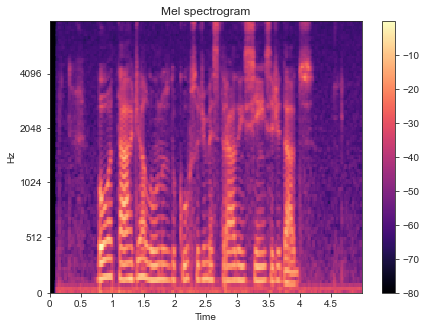

In [11]:
path = './speech_to_text.wav'
audio = Functions()

audio.extract_features(path)
IPython.display.Audio(path)

## Text-to-Speech

c:\Users\rafae\anaconda3\envs\directml\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


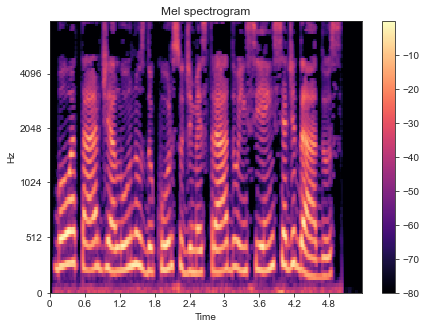

In [9]:
## Define o texto que será usado no processo de 
# text= "Boa tarde a todos os alunos do Curso de Mestrado em Ciência de Dados da PUC-PR"
text = result['transcript']

audio = Functions(
    text=text
)

path = audio.main_TTS()

audio.extract_features(path)
IPython.display.Audio(path) 

## Referências

1. [How to Play and Record Audio in Python](https://www.thepythoncode.com/article/play-and-record-audio-sound-in-python)
2. [The Ultimate Guide To Speech Recognition With Python](https://realpython.com/python-speech-recognition/)
3. [Reconhecimento de Voz em Python](https://medium.com/brasil-ai/reconhecimento-voz-python-35a5023767ca)



